In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/FIA/VISUALIZAÇÕES/PROJETO - Power BI/Falsificacao_DadosAbertos.csv', sep=';')
dataset.head()

,ANO,ESTADO,FAMÍLIA,DENOMINAÇÃO,QUANTIDADE,REGIÃO
0,1995,PARANÁ,Cédulas - 1a. família,50,NaN,SUL
1,1995,RIO DE JANEIRO,Cédulas - 1a. família,50,3.0,SUDESTE
2,1995,RIO DE JANEIRO,Cédulas - 1a. família,100,0.0,SUDESTE
3,1995,SÃO PAULO,Cédulas - 1a. família,100,0.0,SUDESTE
4,1996,DISTRITO FEDERAL,Cédulas - 1a. família,50,1.0,CENTRO-OESTE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#retirar os NaN
dataset.QUANTIDADE.fillna(0, inplace=True)
dataset.QUANTIDADE.replace('.', '', inplace=True)  # pra substituir o ponto por nada
dataset.QUANTIDADE.replace(',00', '', inplace=True)  # pra substituir o ponto por nada
dataset.QUANTIDADE = dataset.QUANTIDADE.astype(int)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ANO          5010 non-null   int64 
 1   ESTADO       5010 non-null   object
 2   FAMÍLIA      5010 non-null   object
 3   DENOMINAÇÃO  5010 non-null   int64 
 4   QUANTIDADE   5010 non-null   int64 
 5   REGIÃO       5010 non-null   object
dtypes: int64(3), object(3)
memory usage: 235.0+ KB


In [ ]:
dataset.isnull().sum()

ANO            0
ESTADO         0
FAMÍLIA        0
DENOMINAÇÃO    0
QUANTIDADE     0
REGIÃO         0
dtype: int64

In [ ]:
# Agrupando, somando as QUANTIDADES e ordenando de forma decrescente
dataset2 = dataset.groupby(['ESTADO', 'REGIÃO'])['QUANTIDADE'].sum().reset_index().sort_values(by='QUANTIDADE', ascending=False)

# Filtrando o Top 7 das Falsificações [quantidade]
dataset_top7 = dataset2.head(7)

In [ ]:
dataset_top7

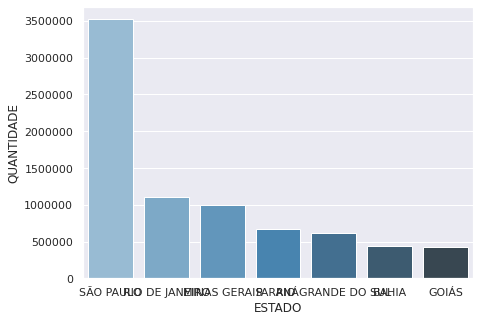

In [ ]:
# BARPLOT do TOP 7 - por Estado
sns.barplot(x=dataset_top7.ESTADO, y=dataset_top7.QUANTIDADE, palette="Blues_d")
plt.ticklabel_format(style='plain', axis='y')
sns.set(rc={'figure.figsize':(13, 10)})
plt.show()

In [ ]:
dataset.QUANTIDADE.astype(float)

In [ ]:
# Agrupando por ANO
dataset_ano = dataset.groupby(['ANO'])['QUANTIDADE'].sum().sort_values().reset_index()
dataset_ano.QUANTIDADE.sum()

10091165

In [ ]:
# Ordenando o ANO [todos os anos q tem]
sorted(dataset_ano.ANO.unique())

In [ ]:
# Quantidade de Anos [cada ANO]
dataset_ano.ANO.nunique()

25

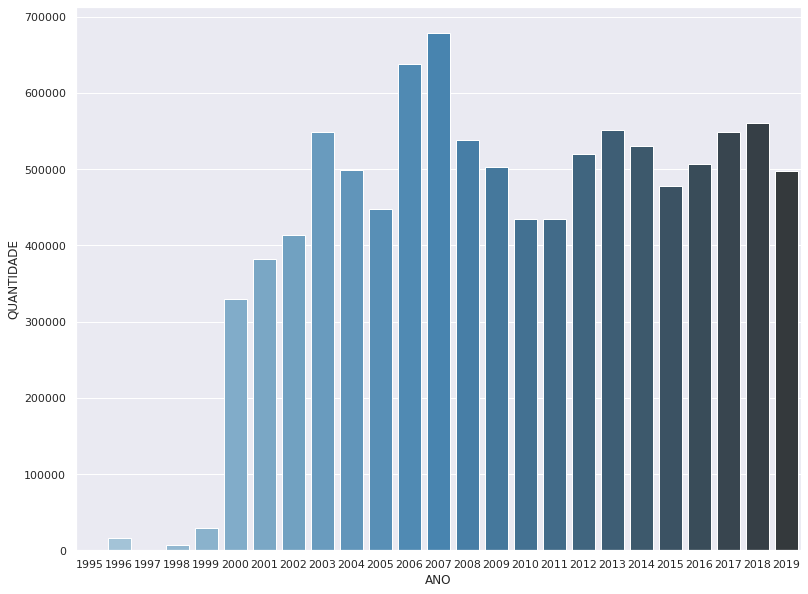

In [ ]:
# BARPLOT por Ano
sns.barplot(x=dataset_ano.ANO, y=dataset_ano.QUANTIDADE, palette="Blues_d")   #ci=None >> tirar o traço de erro
#plt.ticklabel_format(style='plain', axis='y', scilimits=(0, 0))  #plain: simples || scilimits= par de inteiros
sns.set(rc={'figure.figsize':(22, 15)})
plt.show()

In [ ]:
# Agrupando por DENOMINAÇÃO
dataset_deno = dataset.groupby(['DENOMINAÇÃO'])['QUANTIDADE'].sum().sort_values().reset_index()
dataset_deno.DENOMINAÇÃO.sum()

188

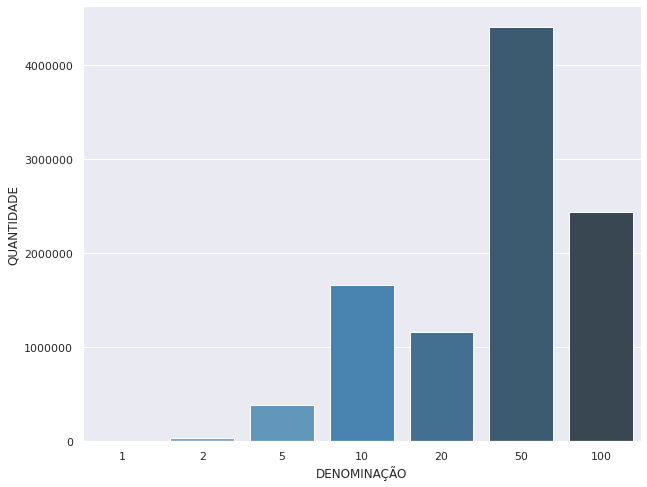

In [ ]:
# BARPLOT por DENOMINAÇÃO
sns.barplot(x=dataset_deno.DENOMINAÇÃO, y=dataset_deno.QUANTIDADE, palette="Blues_d", ci=None)
plt.ticklabel_format(style='plain', axis='y')
sns.set(rc={'figure.figsize':(10, 10)})
plt.show()